## Question 1: Neutrino problem ##

In [38]:
import numpy as np
from sympy import *
init_printing()
import cmath
import matplotlib.pyplot as plt

In [39]:
a,b,e0 = symbols('A,B,E_0') # Define variables in the matrix

In [56]:
H = Matrix([[e0, -a, 0], [-a, e0, -b], [0, -b, e0]]) #Defining H as a matrix using predefined symbols
display(H)

⎡E₀  -A  0 ⎤
⎢          ⎥
⎢-A  E₀  -B⎥
⎢          ⎥
⎣0   -B  E₀⎦

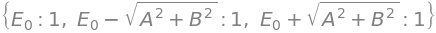

In [55]:
H.eigenvals() #get eigenvalues

In [42]:
H.eigenvects() #get eigenvectors

⎡                  ⎛                      ⎡⎡          A           ⎤⎤⎞  ⎛      
⎢                  ⎜                      ⎢⎢          ─           ⎥⎥⎟  ⎜      
⎢⎛       ⎡⎡-B ⎤⎤⎞  ⎜                      ⎢⎢          B           ⎥⎥⎟  ⎜      
⎢⎜       ⎢⎢───⎥⎥⎟  ⎜        _________     ⎢⎢                      ⎥⎥⎟  ⎜      
⎢⎜       ⎢⎢ A ⎥⎥⎟  ⎜       ╱  2    2      ⎢⎢             _________⎥⎥⎟  ⎜      
⎢⎜E₀, 1, ⎢⎢   ⎥⎥⎟, ⎜E₀ - ╲╱  A  + B  , 1, ⎢⎢            ╱  2    2 ⎥⎥⎟, ⎜E₀ + ╲
⎢⎜       ⎢⎢ 0 ⎥⎥⎟  ⎜                      ⎢⎢E₀   E₀ - ╲╱  A  + B  ⎥⎥⎟  ⎜      
⎢⎜       ⎢⎢   ⎥⎥⎟  ⎜                      ⎢⎢── - ─────────────────⎥⎥⎟  ⎜      
⎢⎝       ⎣⎣ 1 ⎦⎦⎠  ⎜                      ⎢⎢B            B        ⎥⎥⎟  ⎜      
⎢                  ⎜                      ⎢⎢                      ⎥⎥⎟  ⎜      
⎣                  ⎝                      ⎣⎣          1           ⎦⎦⎠  ⎝      

                ⎡⎡          A           ⎤⎤⎞⎤
                ⎢⎢          ─           ⎥⎥⎟⎥
                ⎢⎢          B           

In [43]:
P,D = H.diagonalize() # diagonalising map H

In [44]:
display(P) #Basis tranfromation matrix from eigen basis to physical basis #Matrix of each eigenvectors

⎡-B        A              A       ⎤
⎢───       ─              ─       ⎥
⎢ A        B              B       ⎥
⎢                                 ⎥
⎢        _________      _________ ⎥
⎢       ╱  2    2      ╱  2    2  ⎥
⎢     ╲╱  A  + B    -╲╱  A  + B   ⎥
⎢ 0   ────────────  ──────────────⎥
⎢          B              B       ⎥
⎢                                 ⎥
⎣ 1        1              1       ⎦

In [45]:
display(D) #Diagonalized map of H in eigen basis

⎡E₀          0                  0        ⎤
⎢                                        ⎥
⎢            _________                   ⎥
⎢           ╱  2    2                    ⎥
⎢0   E₀ - ╲╱  A  + B            0        ⎥
⎢                                        ⎥
⎢                               _________⎥
⎢                              ╱  2    2 ⎥
⎣0           0          E₀ + ╲╱  A  + B  ⎦

In [46]:
simplify(P.inv())

⎡                                   2    ⎤
⎢   -A⋅B                           A     ⎥
⎢  ───────          0           ───────  ⎥
⎢   2    2                       2    2  ⎥
⎢  A  + B                       A  + B   ⎥
⎢                                        ⎥
⎢                                   2    ⎥
⎢    A⋅B            B              B     ⎥
⎢───────────  ──────────────  ───────────⎥
⎢  ⎛ 2    2⎞       _________    ⎛ 2    2⎞⎥
⎢2⋅⎝A  + B ⎠      ╱  2    2   2⋅⎝A  + B ⎠⎥
⎢             2⋅╲╱  A  + B               ⎥
⎢                                        ⎥
⎢                                   2    ⎥
⎢    A⋅B           -B              B     ⎥
⎢───────────  ──────────────  ───────────⎥
⎢  ⎛ 2    2⎞       _________    ⎛ 2    2⎞⎥
⎢2⋅⎝A  + B ⎠      ╱  2    2   2⋅⎝A  + B ⎠⎥
⎣             2⋅╲╱  A  + B               ⎦

In [47]:
Pinv = simplify(P.inv()) #Define Pinv as the inverse
simplify(P*D*P.inv()) == H #Verify that this is equal to H

True

In [48]:
h,t = symbols('\hbar,t')

In [49]:
# V1, V2, and V3 represent the the three solutions (the exponentials containing the three eigenvalues).
V1, V2, V3 = symbols('V_1, V_2, V_3')

In [50]:
#Composing the diagonal matrix containing the three solutions.
U = Matrix([[V1, 0, 0], [0, V2, 0], [0, 0, V3]])
display(U)

⎡V₁  0   0 ⎤
⎢          ⎥
⎢0   V₂  0 ⎥
⎢          ⎥
⎣0   0   V₃⎦

In [51]:
#Calculating the matrix P*UP*^-1 to get the matrix that takes the initial conditions and gives the equations of psi(t).
PUPinv = simplify(P*U*P.inv())
display(PUPinv)

⎡ 2                                                          ⎤
⎢A ⋅(V₂ + V₃)    2                                           ⎥
⎢──────────── + B ⋅V₁                                        ⎥
⎢     2                  A⋅(V₂ - V₃)    A⋅B⋅(-2⋅V₁ + V₂ + V₃)⎥
⎢────────────────────   ──────────────  ─────────────────────⎥
⎢       2    2               _________         ⎛ 2    2⎞     ⎥
⎢      A  + B               ╱  2    2        2⋅⎝A  + B ⎠     ⎥
⎢                       2⋅╲╱  A  + B                         ⎥
⎢                                                            ⎥
⎢    A⋅(V₂ - V₃)           V₂   V₃          B⋅(V₂ - V₃)      ⎥
⎢   ──────────────         ── + ──         ──────────────    ⎥
⎢        _________         2    2               _________    ⎥
⎢       ╱  2    2                              ╱  2    2     ⎥
⎢   2⋅╲╱  A  + B                           2⋅╲╱  A  + B      ⎥
⎢                                                            ⎥
⎢                                                2     

In [52]:
#Calculating the equations of psi(t) with the initial conditions (1,0,0).
init = Matrix([1, 0, 0])
int_pupinv = simplify(PUPinv*init)
display(int_pupinv)

⎡ 2                   ⎤
⎢A ⋅(V₂ + V₃)    2    ⎥
⎢──────────── + B ⋅V₁ ⎥
⎢     2               ⎥
⎢──────────────────── ⎥
⎢       2    2        ⎥
⎢      A  + B         ⎥
⎢                     ⎥
⎢    A⋅(V₂ - V₃)      ⎥
⎢   ──────────────    ⎥
⎢        _________    ⎥
⎢       ╱  2    2     ⎥
⎢   2⋅╲╱  A  + B      ⎥
⎢                     ⎥
⎢A⋅B⋅(-2⋅V₁ + V₂ + V₃)⎥
⎢─────────────────────⎥
⎢       ⎛ 2    2⎞     ⎥
⎣     2⋅⎝A  + B ⎠     ⎦

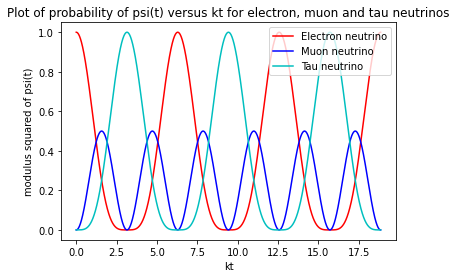

In [59]:
#Plotting the probability of psi()

def phielec(kt):
    return (0.5*np.cos(kt)+0.5)**2

def phimu(kt):
    return (np.sin(kt)/np.sqrt(2))**2

def phitau(kt):
    return (0.5*np.cos(kt)-0.5)**2


kt = np.arange(0, 6*np.pi, 0.0001)


plt.plot(kt, phielec(kt), '-r', label='Electron neutrino')
plt.plot(kt, phimu(kt), '-b', label='Muon neutrino')
plt.plot(kt, phitau(kt), '-c', label='Tau neutrino')
plt.title("Plot of probability of psi(t) versus kt for electron, muon and tau neutrinos")
plt.xlabel("kt")
plt.ylabel("modulus squared of psi(t)")
plt.legend()
plt.show()